# **1. Perkenalan Dataset**


Sumber dataset : https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?hl=ID

Dataset ini merupakan kumpulan data transaksi keuangan yang dirancang untuk mendukung analisis fraud detection dan anomaly detection. Dataset berisi 2.512 catatan transaksi, yang mencakup informasi detail transaksi, profil nasabah, serta pola penggunaan layanan keuangan. Setiap baris data merepresentasikan satu aktivitas transaksi yang utuh, sehingga memungkinkan analisis perilaku finansial pengguna secara mendalam.

Dataset ini umumnya digunakan untuk:

- Analisis perilaku transaksi keuangan
- Deteksi transaksi mencurigakan atau tidak wajar
- Pengembangan model clustering dan analitik berbasis data

Kolom pada dataset:

- TransactionID: Kode unik alfanumerik untuk setiap transaksi
- AccountID: Identitas unik akun, di mana satu akun dapat memiliki banyak transaksi
- TransactionAmount: Nominal nilai transaksi
- TransactionDate: Tanggal dan waktu terjadinya transaksi
- TransactionType: Jenis transaksi (Credit atau Debit)
- Location: Lokasi transaksi berdasarkan kota di Amerika Serikat
- DeviceID: Identitas perangkat yang digunakan untuk melakukan transaksi
- IP Address: Alamat IPv4 yang digunakan saat transaksi
- MerchantID: Identitas merchant tempat transaksi dilakukan
- AccountBalance: Saldo akun setelah transaksi diproses
- PreviousTransactionDate: Waktu transaksi sebelumnya pada akun yang sama
- Channel: Media transaksi (Online, ATM, atau Branch)
- CustomerAge: Usia pemilik akun
- CustomerOccupation: Pekerjaan nasabah (misalnya Dokter, Insinyur, Mahasiswa, Pensiunan)
- TransactionDuration: Durasi transaksi dalam satuan detik
- LoginAttempts: Jumlah percobaan login sebelum transaksi dilakukan

Potensi Penggunaan:
- Membangun model clustering untuk mengelompokkan transaksi berdasarkan karakteristiknya
- Mengidentifikasi pola transaksi normal dan anomali
- Latihan preprocessing, feature selection, dan evaluasi model ML
- Studi kasus klasifikasi multikelas

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [40]:
#Data Loading
uploadData = files.upload()

Saving bank_transactions_data_edited.csv to bank_transactions_data_edited (1).csv


In [41]:
#Memuat datasest & menampilkan 5 data teratas & terbawah
df = pd.read_csv("bank_transactions_data_edited.csv")
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,TX001046,AC00474,230.08,2023-05-01 16:23:40,Debit,Austin,D000045,93.52.44.101,M006,Online,79.0,Retired,124.0,1.0,4466.10,2024-11-04 08:11:47
2533,TX001484,AC00198,561.58,2023-06-23 17:38:26,Debit,Sacramento,D000229,170.154.69.105,M022,Online,65.0,Doctor,23.0,1.0,11748.86,2024-11-04 08:06:32
2534,TX000200,AC00358,493.11,2023-07-31 16:25:26,Debit,Colorado Springs,D000232,35.220.238.127,M022,Branch,53.0,Retired,236.0,1.0,7432.99,2024-11-04 08:08:01
2535,TX000592,AC00057,198.62,2023-05-15 16:19:14,Credit,Tucson,D000378,97.4.209.133,M079,Branch,27.0,Student,84.0,1.0,1196.07,2024-11-04 08:06:38


In [42]:
# Melihat ringkasan struktur dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [43]:
df.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [44]:
df.dtypes

,0
TransactionID,object
AccountID,object
TransactionAmount,float64
TransactionDate,object
TransactionType,object
Location,object
DeviceID,object
IP Address,object
MerchantID,object
Channel,object


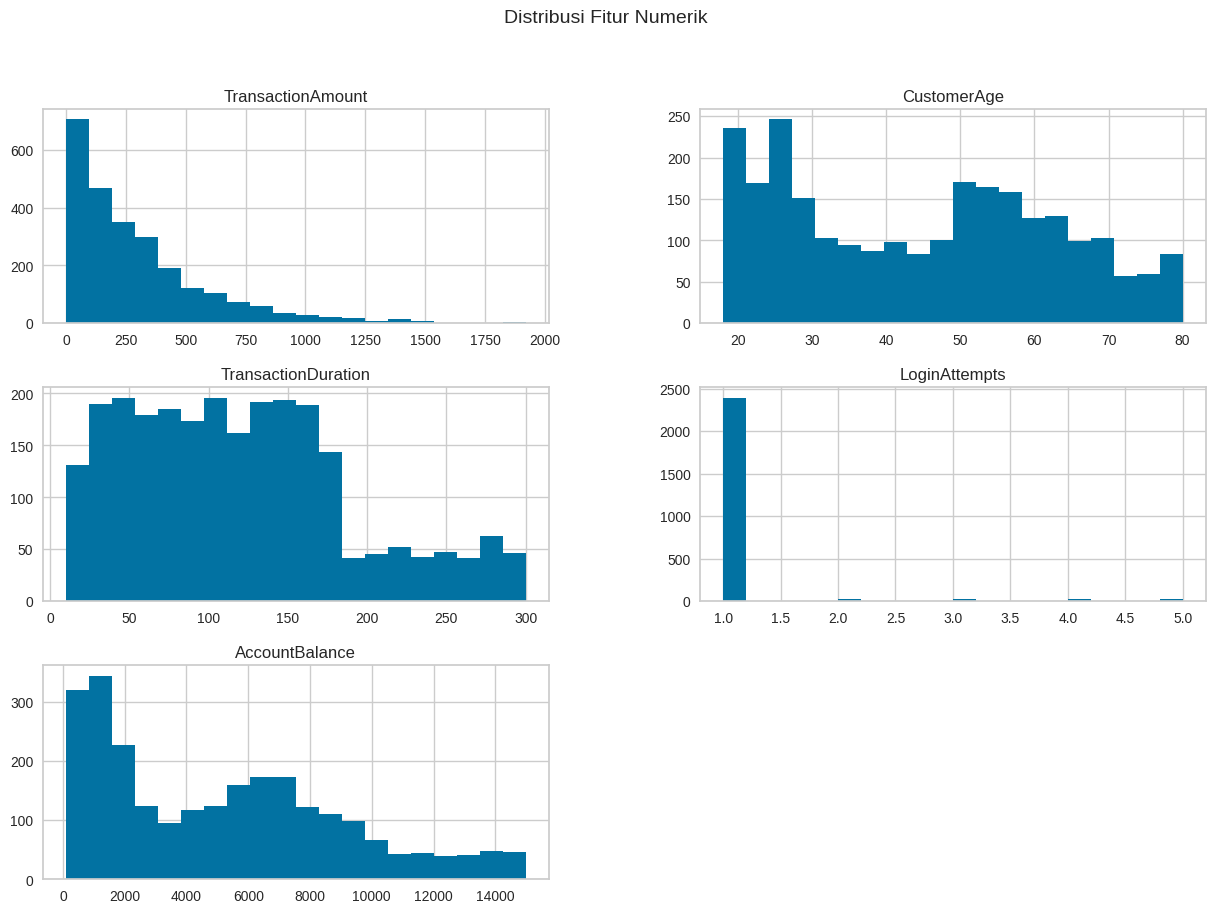

In [45]:
#Visualisasi Distribusi Data Numerik
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribusi Fitur Numerik", fontsize=14)
plt.show()

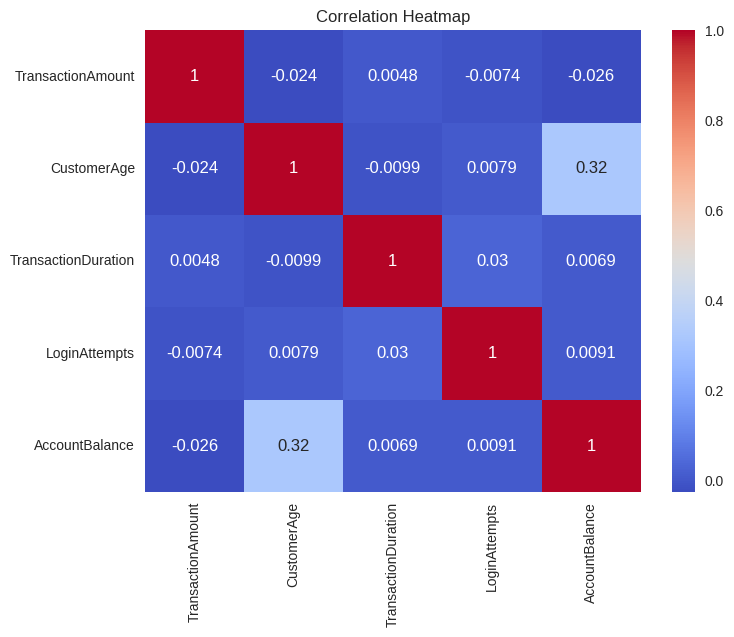

In [46]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

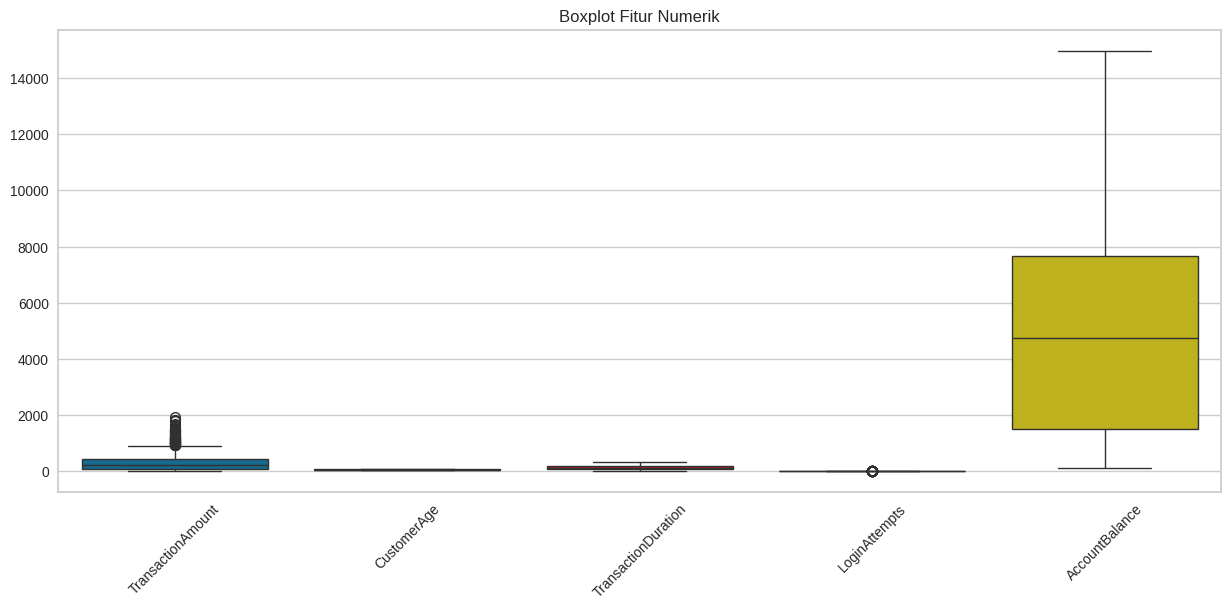

In [47]:
#Visualisasi Boxplot untuk Outlier
plt.figure(figsize=(15,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot Fitur Numerik")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [48]:
#melihat missing value
df.isna().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [49]:
#melihat data duplikat
df.duplicated().sum()

np.int64(21)

In [50]:
#copy dataset untuk preprocessing
df_copy = df.copy()

In [51]:
#menghapus data kosong dan duplikat
df_copy = df_copy.dropna()
df_copy = df_copy.drop_duplicates()

In [52]:
#melihat missing value setelah penghapusan
df_copy.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [53]:
#melihat data duplikat setelah penghapusan
df_copy.duplicated().sum()

np.int64(0)

In [54]:
#menghapus kolom tidak relevan
cols_to_drop = [  'TransactionID','AccountID','DeviceID','IP Address','MerchantID']
df_copy = df_copy.drop(columns=cols_to_drop, errors='ignore')


In [55]:
#memilah kolom numerik
num_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns
#memilah kolom kategorikal
cat_cols = df_copy.select_dtypes(include=['object']).columns


In [56]:
#melakukan scaling dengan standard scaler
scaler = StandardScaler()
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])

In [57]:
#melakukan encoding dengan laber encoder
encoders = {}
categorical_cols = df_copy.select_dtypes(include='object').columns

for col in categorical_cols:
    le=LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])
    encoders[col]=le

In [58]:
#hasil setelah dilakukan scaling dan encoding
df_copy.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,-0.976321,591,1,36,0,1.423196,0,-0.552642,-0.203367,0.004753,105
1,0.268633,1031,1,15,0,1.311032,0,0.294261,-0.203367,2.211240,192
2,-0.590614,1097,1,23,2,-1.436987,3,-0.905518,-0.203367,-1.013390,41
3,-0.390507,712,1,33,2,-1.044413,3,-1.343085,-0.203367,0.886881,163
5,-0.707976,550,1,28,0,-1.493069,3,0.731827,-0.203367,-1.100323,13


In [59]:
#melakukan penanganan outlier
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

df_copy = remove_outliers_iqr(df_copy, num_cols)

In [60]:
 #mengelompokkan nilai transaksi menjadi 3 kategori
if 'TransactionAmount' in df_copy.columns:

    df_copy['TransactionAmount_bin'] = pd.cut(
        df_copy['TransactionAmount'],
        bins=3,
        labels=['Low', 'Medium', 'High']
    )
df_copy[['TransactionAmount', 'TransactionAmount_bin']].head()

,TransactionAmount,TransactionAmount_bin
0,-0.976321,Low
1,0.268633,Medium
2,-0.590614,Low
3,-0.390507,Low
5,-0.707976,Low


In [61]:
df_copy.head()


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionAmount_bin
0,-0.976321,591,1,36,0,1.423196,0,-0.552642,-0.203367,0.004753,105,Low
1,0.268633,1031,1,15,0,1.311032,0,0.294261,-0.203367,2.211240,192,Medium
2,-0.590614,1097,1,23,2,-1.436987,3,-0.905518,-0.203367,-1.013390,41,Low
3,-0.390507,712,1,33,2,-1.044413,3,-1.343085,-0.203367,0.886881,163,Low
5,-0.707976,550,1,28,0,-1.493069,3,0.731827,-0.203367,-1.100323,13,Low


In [62]:
df_copy.to_csv("bank_transactions_preprocessed.csv", index=False)
